In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from scipy.stats import norm, skew
warnings.filterwarnings('ignore')
%matplotlib inline
os.getcwd()

'/Users/mehdi/house_price'

import train and test set data

In [2]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

# Uncomment this to drop outliers in the dataset. 
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index).reset_index(drop=True)
#train = train.drop(train[(train['LotArea']>100000)].index).reset_index(drop=True)
#train = train.drop(train[(train['OverallCond']==2)&(train["SalePrice"]>300000)].index).reset_index(drop=True)
#train = train.drop(train[(train['OverallCond']==6)&(train["SalePrice"]>500000)].index).reset_index(drop=True)
#train = train.drop(train[(train['LotFrontage']>300)].index).reset_index(drop=True)
len(train), len(test)

(1458, 1459)

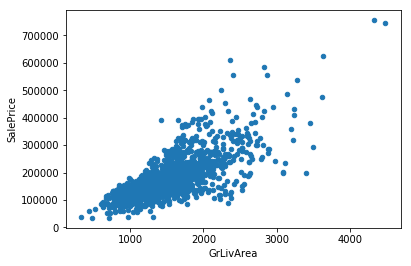

In [3]:
train.plot.scatter(x="GrLivArea", y="SalePrice")

Checking out the training and test data

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


removing the Id column from training and test sets

In [6]:
train_Id = train["Id"]
test_Id = test["Id"]
train = train.drop("Id", axis=1)
test = test.drop("Id", axis=1)

separating the SalePrice (target variable) column in training data

In [7]:
price = train["SalePrice"]
train.drop("SalePrice", inplace=True, axis=1)

# Feature manipulations

Here, we go through the features in our datasets and look for and fix the followings:
- features that are stored as numerical but are categorical in nature (and vice versa)
- features with missing values

First, let's concatenate training and test set data. This way we make sure any change to features is applied the same way to both datasets. [is this ok?]

In [8]:
all_X = pd.concat([train, test]).reset_index(drop=True)
len_train = len(train)
# all_X.iloc[:len_train, :] is the training data and all_X.iloc[len_train:, :] is the test set.
all_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


identifying numerical and categorical features

In [9]:
features = all_X.columns
num_features = all_X.select_dtypes(include="number").columns
cat_features = all_X.select_dtypes(exclude="number").columns
print("Numerical features:\n", num_features.tolist())
print("Categorical features:\n", cat_features.tolist())

Numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTyp

MSSubClass is categorical but is stored as numerical, so we will change it.

In [10]:
all_X["MSSubClass"] = all_X["MSSubClass"].astype(str)

In [11]:
features = all_X.columns
num_features = all_X.select_dtypes(include="number").columns
cat_features = all_X.select_dtypes(include="object").columns

Let's move to handling the missing values

In [12]:
miss_data_features = features[all_X.isnull().sum()>0]
miss_data_features

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

Looking at the desciption of features (as provided by the documentation), we fill the missing values.
For some features it is clear by the documentation what the missing value means, e.g. Nan "PoolQC" means no pool. 
For some we fill Nans with the median or mode of the same feature for houses in the same neighborhood.
Anyway, this part is not 100% objective but it doesn't seem to matter much

[double check this part]

In [13]:
replace_with_typ = ["Functional"]
replace_with_median = ["LotFrontage"]
replace_with_mode = ["MSZoning", "Exterior1st", "Exterior2nd", "Electrical",
                     "KitchenQual", "SaleType", "Utilities", "GarageYrBlt"]
replace_with_None = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                  "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                   "GarageCond", "PoolQC", "Fence", "MiscFeature"]
replace_with_zero = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                     "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"]

replaced = ["LotFrontage", "MSZoning", "Exterior1st", "Exterior2nd", "Electrical", "KitchenQual", "SaleType",
           "Utilities", "GarageYrBlt"]

for feature in replaced:
    all_X[feature + "_missing"] = all_X[feature].isnull()

for feature in replace_with_typ:
    all_X[feature].fillna("Typ", inplace=True)

for feature in replace_with_median:
    all_X[feature] = all_X.groupby("Neighborhood")[feature].transform(lambda s: s.fillna(s.median()))

for feature in replace_with_mode:
    all_X[feature] = all_X.groupby("Neighborhood")[feature].transform(lambda s: s.fillna(s.mode()[0]))
    
for feature in replace_with_None:
    all_X[feature].fillna("None", inplace=True)

for feature in replace_with_zero:
    all_X[feature].fillna(0, inplace=True)

Making sure that everything is filled

In [14]:
all_X.isnull().sum().sum()

0

In [15]:
features = all_X.columns
num_features = all_X.select_dtypes(include="number").columns
cat_features = all_X.select_dtypes(include="object").columns

looking at "Utilities", just one single observation has a different value from the rest. So, it doesn't add to the predictive power of our model. So, we drop it. 

In [16]:
all_X.drop(["Utilities", "Utilities_missing"], axis=1, inplace=True)

In [17]:
features = all_X.columns
num_features = all_X.select_dtypes(include="number").columns
cat_features = all_X.select_dtypes(include="object").columns

# Changing quality features to numerical labels

I had an idea that chaning features that represent quality-like information to labels 0,1,2,... would help the learning process. My expectation was that giving the ordering, e.g. bad-->0 good-->1 excellent-->2, would reinforce the ordering of bad < good < excellent. However, after implementing this, the error of validation data didn't change at all. It even became slightly worse overall, but the change was in the margine of errors.     
Changing 2-level categorical features to 0-1 levels

In [18]:
# print("number of unique values in:")
# for feature in cat_features:
#     print(feature+":", all_X[feature].describe()["unique"])

all_X["Street"]= (all_X["Street"]=="Pave")
all_X["CentralAir"] = (all_X["CentralAir"]=="Y")

# # why we shouldnt use LabelEncoder?

# mapping = {"Reg":0, "IR1":1, "IR2":2, "IR3":3}
# all_X["LotShape"] = all_X["LotShape"].map(lambda s: mapping[s])

# mapping = {"Gtl":0, "Mod":1, "Sev":2}
# all_X["LandSlope"] = all_X["LandSlope"].map(lambda s: mapping[s])


# mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
# all_X["ExterQual"] = all_X["ExterQual"].map(lambda s: mapping[s])


# mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
# all_X["ExterCond"] = all_X["ExterCond"].map(lambda s: mapping[s])


# mapping = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
# all_X["BsmtQual"] = all_X["BsmtQual"].map(lambda s: mapping[s])


# mapping = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
# all_X["BsmtCond"] = all_X["BsmtCond"].map(lambda s: mapping[s])


# mapping = {"None":0, "No":1, "Mn":2, "Av":3, "Gd":4}
# all_X["BsmtExposure"] = all_X["BsmtExposure"].map(lambda s: mapping[s])


# mapping = {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
# all_X["BsmtFinType1"] = all_X["BsmtFinType1"].map(lambda s: mapping[s])

# mapping = {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
# all_X["BsmtFinType2"] = all_X["BsmtFinType2"].map(lambda s: mapping[s])


# mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
# all_X["HeatingQC"] = all_X["HeatingQC"].map(lambda s: mapping[s])

# mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
# all_X["KitchenQual"] = all_X["KitchenQual"].map(lambda s: mapping[s])


# mapping = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
# all_X["FireplaceQu"] = all_X["FireplaceQu"].map(lambda s: mapping[s])


# mapping = {"None":0, "Unf":1, "RFn":2, "Fin":3}
# all_X["GarageFinish"] = all_X["GarageFinish"].map(lambda s: mapping[s])


# mapping = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
# all_X["GarageQual"] = all_X["GarageQual"].map(lambda s: mapping[s])


# mapping = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
# all_X["GarageCond"] = all_X["GarageCond"].map(lambda s: mapping[s])


# mapping = {"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
# all_X["PoolQC"] = all_X["PoolQC"].map(lambda s: mapping[s])

# Final features

In [19]:
features = all_X.columns
num_features = all_X.select_dtypes(include="number").columns
cat_features = all_X.select_dtypes(include="object").columns
print("Numerical features:\n", num_features.tolist())
print("Categorical features:\n", cat_features.tolist())

Numerical features:
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical features:
 ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Ga

# Numerical features normalization

In [20]:
log_transform_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                          'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                          'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                          '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for feature in log_transform_features:
    all_X[feature] = np.log1p(all_X[feature])

let's rescale numerical features to have zero mean and std 1. 

In [21]:
for feature in num_features:
    mean, std = all_X[feature].mean(), all_X[feature].std()
    all_X[feature] = (all_X[feature]- mean)/std
all_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType,SaleCondition,LotFrontage_missing,MSZoning_missing,Exterior1st_missing,Exterior2nd_missing,Electrical_missing,KitchenQual_missing,SaleType_missing,GarageYrBlt_missing
0,60,RL,-0.049875,-0.101744,True,None,Reg,Lvl,Inside,Gtl,...,WD,Normal,False,False,False,False,False,False,False,False
1,20,RL,0.574926,0.149410,True,None,Reg,Lvl,FR2,Gtl,...,WD,Normal,False,False,False,False,False,False,False,False
2,60,RL,0.085741,0.461603,True,None,IR1,Lvl,Inside,Gtl,...,WD,Normal,False,False,False,False,False,False,False,False
3,70,RL,-0.290226,0.139131,True,None,IR1,Lvl,Corner,Gtl,...,WD,Abnorml,False,False,False,False,False,False,False,False
4,60,RL,0.721984,0.928292,True,None,IR1,Lvl,FR2,Gtl,...,WD,Normal,False,False,False,False,False,False,False,False


categorical features has to get modified, so we can input this data to a regression model. 
We use one-hot method

In [22]:
print("number of features in training data = ", len(all_X.columns))
one_hot_all_X = pd.get_dummies(all_X)
print("number of features after adding dummy variables = ", len(one_hot_all_X.columns))

number of features in training data =  86
number of features after adding dummy variables =  320


In [23]:
# from sklearn.feature_selection import VarianceThreshold

#varTh = VarianceThreshold(threshold=(0.005))
#X_reduced = varTh.fit_transform(one_hot_all_X)
#X = X_reduced[:len_train, :]
#X_test = X_reduced[len_train:, :]
#X.shape , X_test.shape

Finally, let's separate training and test data.

In [24]:
X = one_hot_all_X.iloc[:len_train, :]
X_test = one_hot_all_X.iloc[len_train:, :]
len(X), len(X_test)

(1458, 1459)

In [25]:
# run this after training Lasso to remove unimportant features. it reduces the error!

#X = one_hot_all_X[one_hot_all_X.columns[model_Lasso.coef_ != 0]].iloc[:len_train, :]
#X_test = one_hot_all_X[one_hot_all_X.columns[model_Lasso.coef_ != 0]].iloc[len_train:, :]
#X.shape, X_test.shape

# Manipulation of target variable

Let's see the distribution of the target variable, SalePrice 

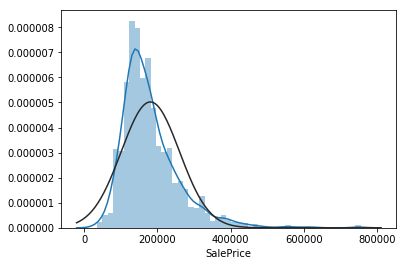

In [26]:
sns.distplot(price, fit=norm);

As we can see it's far from normal distribution. So it's better to perform a transformation to make it more Gaussian.

We apply a log transformation. This intuitively makes sense, since we expect the ratio of prices to be relevant. So log(price) is a better variable to work with. Also, the testing of the competition suggest the log transformation.

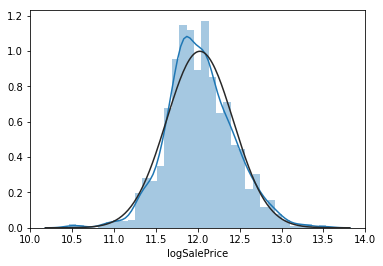

In [27]:
log_price = np.log(price).rename("logSalePrice")
sns.distplot(log_price, fit=norm)

Now It's looking more like a normal distribution. Let's also renormalize the logSalePrice data.

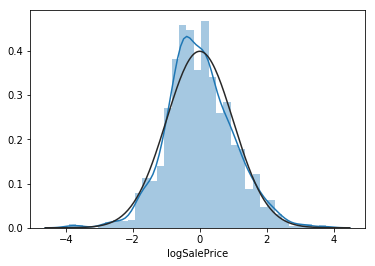

In [28]:
log_price_mean = log_price.mean()
log_price_std = log_price.std()
y = (log_price - log_price_mean)/log_price_std
sns.distplot(y, fit=norm)
# it is important to remember the manipulation on labels, since we have to do the reverse
# on our prediction to recover sale prices in $. 

# output compiled data

In [29]:
# X.to_csv("X.csv", index=False)
# y.to_csv("y.csv", index=False)
# X_test.to_csv("X_test.csv", index=False)
# test_Id.to_csv("test_Id.csv", index=False)

# Modelling

In [30]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold


def rmse_cv(model):
    kf = KFold(5, shuffle=True, random_state=0).get_n_splits(X)
    rmse = log_price_std * np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return rmse.mean(), rmse.std()

### Knn

(0.1737077950748519, 0.004382890164904869)

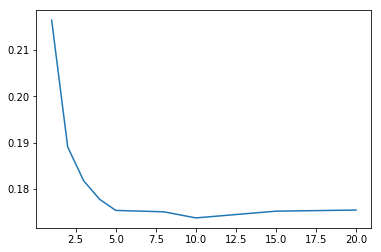

In [31]:
from sklearn.neighbors import KNeighborsRegressor

ns = [1,2,3,4,5,8,10,15,20]
rmse = []
for n in ns:
    model = KNeighborsRegressor(n_neighbors=n)
    rmse.append(rmse_cv(model)[0])

plt.plot(ns, rmse)

model_Knn = KNeighborsRegressor(n_neighbors=10).fit(X, y)
rmse_cv(model_Knn)

### Ridge

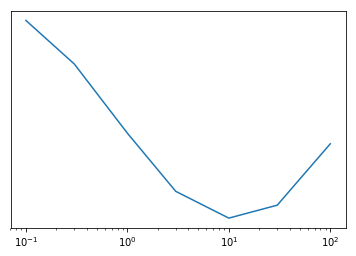

In [32]:
alphas =[0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0]
rmse = []
for alpha in alphas:
    model = Ridge(alpha)
    rmse.append(rmse_cv(model)[0])

plt.loglog(alphas, rmse)

validation error: (0.11328405936843447, 0.006590879695846075)


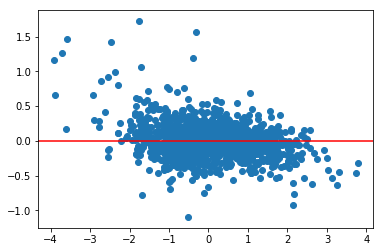

In [33]:
model_Ridge = Ridge(alpha=10.0).fit(X, y)
print("validation error:", rmse_cv(model_Ridge))
plt.scatter(y, model_Ridge.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### Lasso

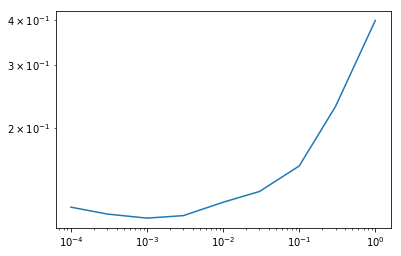

In [34]:
alphas =[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]
rmse = []
for alpha in alphas:
    model = Lasso(alpha)
    rmse.append(rmse_cv(model)[0])

plt.loglog(alphas, rmse)

validation error: (0.11143379210190178, 0.006501334014033193)
number of features with non-zero coefficient:  119


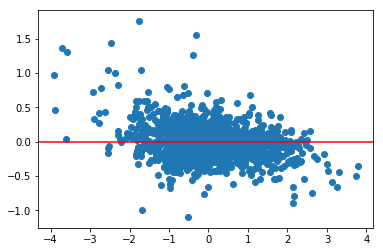

In [35]:
model_Lasso = Lasso(alpha = 0.001).fit(X, y)
print("validation error:", rmse_cv(model_Lasso))
plt.scatter(y, model_Lasso.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')
print("number of features with non-zero coefficient: ", np.sum(model_Lasso.coef_ != 0))

### Elastic Net

validation error: (0.11145617413258166, 0.006313254741139967)


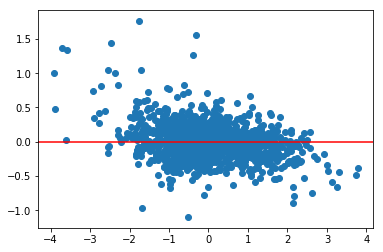

In [36]:
model_ENet = ElasticNetCV(l1_ratio=(0.1,0.3,0.5,0.7,0.9,0.95,0.99, 0.999)).fit(X, y)
print("validation error:", rmse_cv(model_ENet))
plt.scatter(y, model_ENet.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### XGBboost

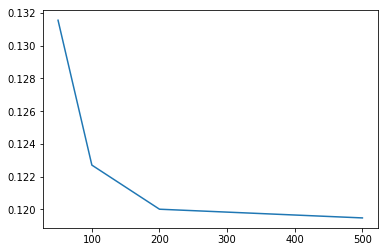

In [37]:
from xgboost import XGBRegressor

ns = [50,100,200,500]
rmse = []
for n in ns:
    model_XGB = XGBRegressor(n_estimators=n)
    rmse.append(rmse_cv(model_XGB)[0])
plt.plot(ns, rmse)

validation error: (0.11947591593504522, 0.007171533475980459)


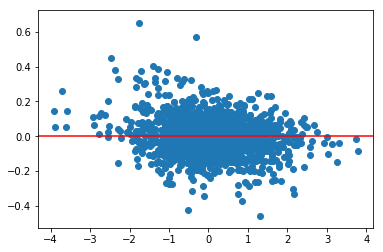

In [38]:
model_XGB = XGBRegressor(n_estimators=500, random_state=1).fit(X, y)
print("validation error:", rmse_cv(model_XGB))
plt.scatter(y, model_XGB.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### SVM

validation error: (0.11086791239076269, 0.0074682160070998205)


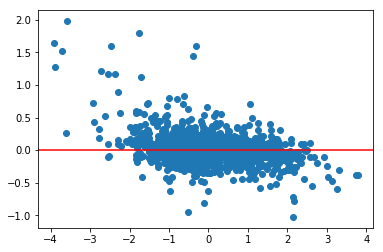

In [70]:
from sklearn import svm

model_svm = svm.SVR(kernel="rbf", C=10, gamma=0.001).fit(X, y)
print("validation error:", rmse_cv(model_svm))
plt.scatter(y, model_svm.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### Bagg (Lasso)

validation error: (0.11173229848612094, 0.005938962648435087)


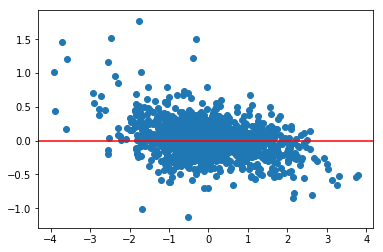

In [40]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

model_Bagg = BaggingRegressor(Lasso(alpha=0.001), max_samples=0.9, max_features=0.8).fit(X, y)
print("validation error:", rmse_cv(model_Bagg))
plt.scatter(y, model_Bagg.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### Gradient Boosting Regressor
##### (sklearn implementation of xgboost)

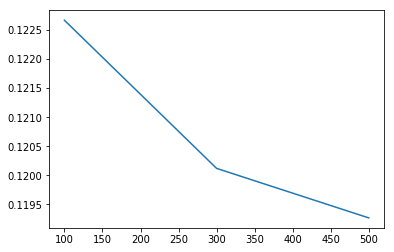

In [41]:
ns = [100, 300, 500]
rmse = []
for n in ns:
    model = GradientBoostingRegressor(n_estimators=n)
    rmse.append(rmse_cv(model)[0])
plt.plot(ns, rmse)

validation error: (0.119139885362186, 0.007042033951714891)


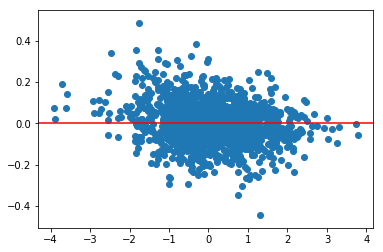

In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

model_GBR = GradientBoostingRegressor(n_estimators=500).fit(X, y)
# print(log_price_std*np.sqrt(mean_squared_error(model_GBR.predict(X_train),y_train)))
# print(log_price_std*np.sqrt(mean_squared_error(model_GBR.predict(X_val),y_val)))

print("validation error:", rmse_cv(model_GBR))
plt.scatter(y, model_GBR.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### Random Forest Regressor

validation error: (0.13390196850579994, 0.008116024603484326)


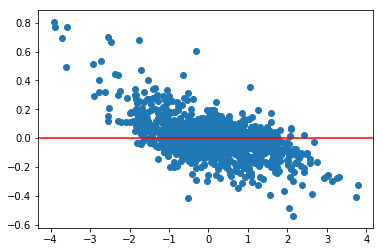

In [43]:
model_RFR = RandomForestRegressor(n_estimators=1000, max_features=50).fit(X, y)
print("validation error:", rmse_cv(model_RFR))
plt.scatter(y, model_RFR.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

### Average of Models

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, ratio="equal"):
        self.models = models
        if ratio=="equal":
            self.ratio = np.ones(len(models))/len(models)
        else:
            self.ratio = np.array(ratio)
        assert len(self.ratio)==len(self.models), "models and ratio do not have the same length"

        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.sum(predictions*self.ratio, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator AveragingModels modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator AveragingModels modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator AveragingModels modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Library/Frameworks/Python.framewo

validation error: (0.10853008142007033, 0.006872374180716271)


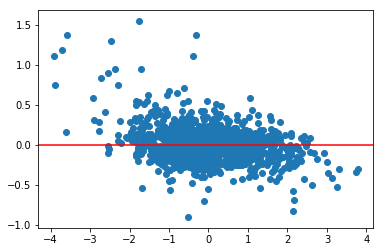

In [71]:
models = [model_Lasso, model_Ridge, model_XGB, model_svm]
average_model = AveragingModels(models=models, ratio=[0.2,0.2,0.2,0.4]).fit(X, y)
print("validation error:", rmse_cv(average_model))
plt.scatter(y, average_model.predict(X)-y)
plt.axhline(y=0.0, color='r', linestyle='-')

In [46]:
prediction = average_model.predict(X_test)
prediction

array([-0.85107924, -0.21656293,  0.24768036, ..., -0.04528716,
       -0.8509243 ,  0.71601593])

In [47]:
import datetime

date = str(datetime.date.today())
my_submission = pd.DataFrame({"Id":test_Id, "SalePrice": np.exp(prediction*log_price_std + log_price_mean)})
if input()=="y":
    my_submission.to_csv("submission"+date+".csv", index=False)

n


In [48]:
stop!

SyntaxError: invalid syntax (<ipython-input-48-8c726f94684c>, line 1)

# IGNORE

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



EPOCHS = 500
model_nn = keras.Sequential([
            keras.layers.Dense(100, activation=tf.nn.tanh,
                       input_shape=(1,)),
            #keras.layers.Dense(10, activation=tf.nn.relu),
            #keras.layers.Dropout(0.6),
            keras.layers.Dense(1)])
model_nn.compile(loss='mse', optimizer="adam", metrics=['mse'])
model_nn.fit(y_hat, y, epochs=EPOCHS, verbose=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

average_model.fit(X_train, y_train)
y_hat_train = average_model.predict(X_train)

In [ ]:
model_meta_RFR = XGBRegressor(n_estimators=100)
model_meta_RFR.fit(y_hat_train.reshape(-1,1), y_train)

plt.scatter(y, y_hat-y)
plt.scatter(y, model_meta_RFR.predict(y_hat.reshape(-1,1))-y)

In [ ]:
from sklearn.metrics import mean_squared_error

y_hat_val = average_model.predict(X_val)
y_hat_val_meta_RFR = model_meta_RFR.predict(y_hat_val.reshape(-1,1))
y_hat_train_meta_RFR = model_meta_RFR.predict(y_hat_train.reshape(-1,1))

mean_squared_error(y_hat_val_meta_RFR, y_val), mean_squared_error(y_hat_val, y_val)

In [ ]:
mean_squared_error(y_hat_train_meta_RFR, y_train), mean_squared_error(y_hat_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_hat_val_meta_RFR, y_val))*log_price_std